In [39]:
%matplotlib inline
import cv2
import numpy as np
from scipy.misc import *
import matplotlib.pyplot as plt
import pymeanshift as pms
import time
from PIL.Image import *

In [43]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_faces(img):
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=0,
        minSize=(5, 5),
        flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    return len(faces), faces

In [48]:
start = time.time()
original_image = imresize(cv2.imread("abba.png"), (202, 290))
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

(segmented_image, labels_image, number_regions) = pms.segment(original_image, spatial_radius=20, 
                                                              range_radius=20, min_density=300)
print number_regions
end = time.time()
print(end - start), 'seconds'

8
21.2605011463 seconds


2 is a face
3 isn't a face
4 isn't a face
5 isn't a face
7 isn't a face
8 isn't a face


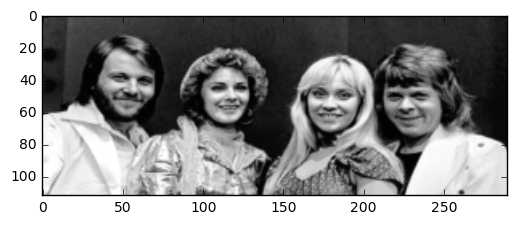

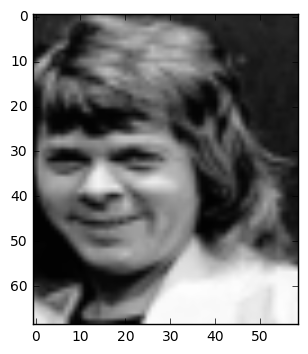

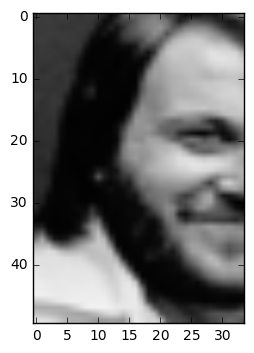

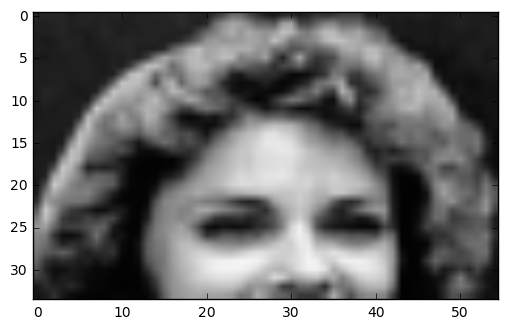

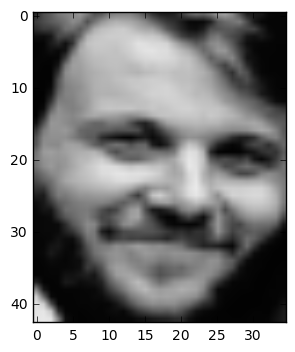

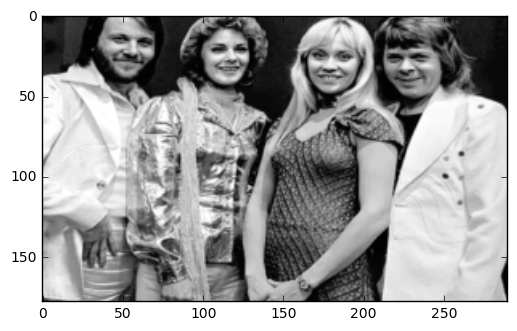

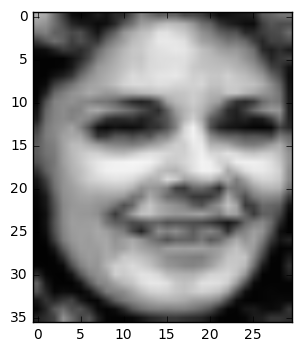

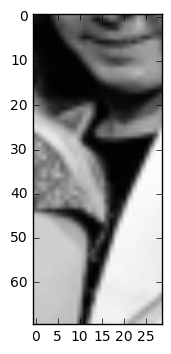

In [49]:
images = np.zeros((20, 3, 48, 48))
labels = np.zeros((20, 2))
for i in range(number_regions):
    segmented = segmented_image.copy()
    segmented[labels_image != i] = [0, 0, 0]
    segmented[labels_image == i] = original_image[labels_image == i]
    plt.figure()
    (x1, y1, x2, y2) = fromarray(segmented).getbbox()
    plt.imshow(original_image[y1:y2, x1:x2])
    faces_num, faces = detect_faces(original_image[y1:y2, x1:x2])
    if faces_num == 1:
        images[i, :, :, :] = np.transpose(imresize(original_image[y1:y2, x1:x2], (48, 48)), (2, 0, 1))
        labels[i] = [1, 0]
        print i+1, 'is a face'
    elif faces_num == 0:
        images[i, :, :, :] = np.transpose(imresize(original_image[y1:y2, x1:x2], (48, 48)), (2, 0, 1))
        labels[i] = [0, 1]
        print i+1, "isn't a face"